## Conjunto de ventas Amazon India 2025
El conjunto de datos de ventas de Amazon Diwali en India (2025) es un conjunto de datos sintéticos que contiene 15,000transacciones de comercio electrónico diseñado para simular las ventas reales en Amazon India. Captura el comportamiento de compra de los clientes, los detalles de los productos, las preferencias de pago y los patrones de comentarios en diversas categorías de productos a lo largo del año.2025.

Order_ID: Identificador único para cada pedido

Date: Fecha en que se realizó el pedido

Customer_ID: Identificador único del cliente

Product_Category: Categoría principal del producto adquirido.

Product_Name: Producto específico dentro de la categoría.

Quantity: Número de unidades pedidas de ese artículo.

Unit_Price_INR: Precio por unidad en rupias indias (₹).

Total_Sales_INR: Valor total de ventas = Cantidad × Precio_Unitario_INR.

Payment_Method: Forma de pago utilizada para el pedido.

Delivery_Status: Indica si el pedido fue entregado, está pendiente o fue devuelto.

Review_Rating: Valoración del cliente para el producto

Review_Text: Breve reseña coherente con el sentimiento de la valoración.

State: El estado indio donde se entregó el pedido.

Country: País de la orden

In [83]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import chi2_contingency

In [2]:
amazon = pd.read_csv(r'C:\Users\dell\Downloads\amazon_sales_2025_INR.csv')

In [3]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          15000 non-null  object 
 1   Date              15000 non-null  object 
 2   Customer_ID       15000 non-null  object 
 3   Product_Category  15000 non-null  object 
 4   Product_Name      15000 non-null  object 
 5   Quantity          15000 non-null  int64  
 6   Unit_Price_INR    15000 non-null  float64
 7   Total_Sales_INR   15000 non-null  float64
 8   Payment_Method    15000 non-null  object 
 9   Delivery_Status   15000 non-null  object 
 10  Review_Rating     15000 non-null  int64  
 11  Review_Text       15000 non-null  object 
 12  State             15000 non-null  object 
 13  Country           15000 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.6+ MB


In [4]:
amazon.head()

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India


In [5]:
amazon.columns

Index(['Order_ID', 'Date', 'Customer_ID', 'Product_Category', 'Product_Name',
       'Quantity', 'Unit_Price_INR', 'Total_Sales_INR', 'Payment_Method',
       'Delivery_Status', 'Review_Rating', 'Review_Text', 'State', 'Country'],
      dtype='object')

In [6]:
amazon.nunique()

Order_ID            15000
Date                  365
Customer_ID          7259
Product_Category        5
Product_Name           25
Quantity                5
Unit_Price_INR      14981
Total_Sales_INR     14988
Payment_Method          4
Delivery_Status         3
Review_Rating           5
Review_Text            25
State                  28
Country                 1
dtype: int64

In [7]:
amazon['Date'] = pd.to_datetime(amazon['Date'])

In [8]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          15000 non-null  object        
 1   Date              15000 non-null  datetime64[ns]
 2   Customer_ID       15000 non-null  object        
 3   Product_Category  15000 non-null  object        
 4   Product_Name      15000 non-null  object        
 5   Quantity          15000 non-null  int64         
 6   Unit_Price_INR    15000 non-null  float64       
 7   Total_Sales_INR   15000 non-null  float64       
 8   Payment_Method    15000 non-null  object        
 9   Delivery_Status   15000 non-null  object        
 10  Review_Rating     15000 non-null  int64         
 11  Review_Text       15000 non-null  object        
 12  State             15000 non-null  object        
 13  Country           15000 non-null  object        
dtypes: datetime64[ns](1), 

In [9]:
amazon.duplicated().value_counts()

False    15000
Name: count, dtype: int64

In [10]:
#**Con esta linea podemos verificar cuantos espacios vacios hay en todo el df**
espacios_vacios = amazon.applymap(lambda x: isinstance(x, str) and x.strip() == '')
espacios_vacios.sum().sum()
amazon[espacios_vacios.any(axis=1)]

C:\Users\dell\AppData\Local\Temp\ipykernel_2804\1906965997.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  espacios_vacios = amazon.applymap(lambda x: isinstance(x, str) and x.strip() == '')


,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country


In [11]:
#Filtramos el Df para conocer el comportamiento de los clientes
amazon_filtrado = amazon.groupby(['Customer_ID','Product_Category', 'Product_Name', 'Total_Sales_INR', 'Payment_Method', 'Delivery_Status']).size().reset_index(name='count')
amazon_filtrado.head()

,Customer_ID,Product_Category,Product_Name,Total_Sales_INR,Payment_Method,Delivery_Status,count
0,CUST1000,Clothing,T-Shirt,36242.45,UPI,Returned,1
1,CUST1000,Home & Kitchen,Vacuum Cleaner,16816.04,Debit Card,Pending,1
2,CUST1001,Books,Comics,34015.44,Debit Card,Returned,1
3,CUST1001,Electronics,Smartwatch,28517.32,UPI,Returned,1
4,CUST1001,Home & Kitchen,Vacuum Cleaner,44468.50,UPI,Delivered,1


In [12]:
print(amazon_filtrado['Delivery_Status'].value_counts())
print()
print(amazon_filtrado['Product_Category'].value_counts())
print()
print(amazon_filtrado['Payment_Method'].value_counts())

Delivery_Status
Delivered    5075
Pending      5044
Returned     4881
Name: count, dtype: int64

Product_Category
Electronics       3036
Books             3035
Clothing          3022
Beauty            2997
Home & Kitchen    2910
Name: count, dtype: int64

Payment_Method
Cash on Delivery    3827
Credit Card         3800
Debit Card          3727
UPI                 3646
Name: count, dtype: int64


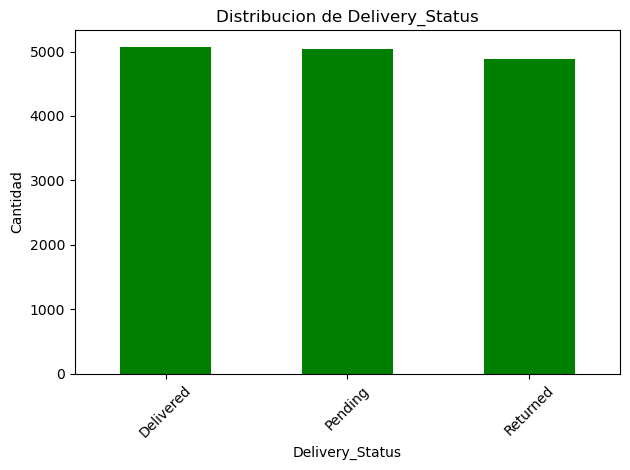

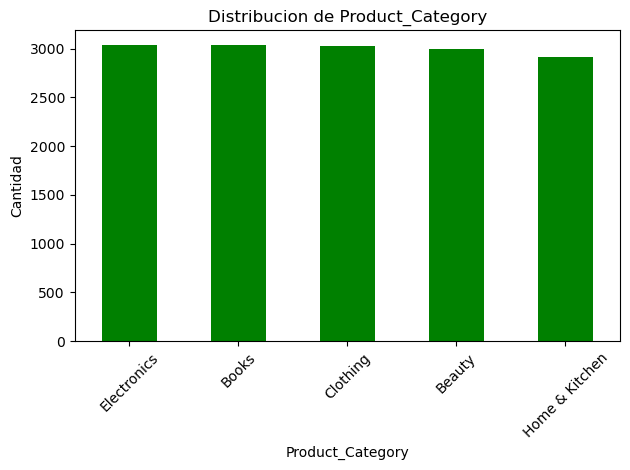

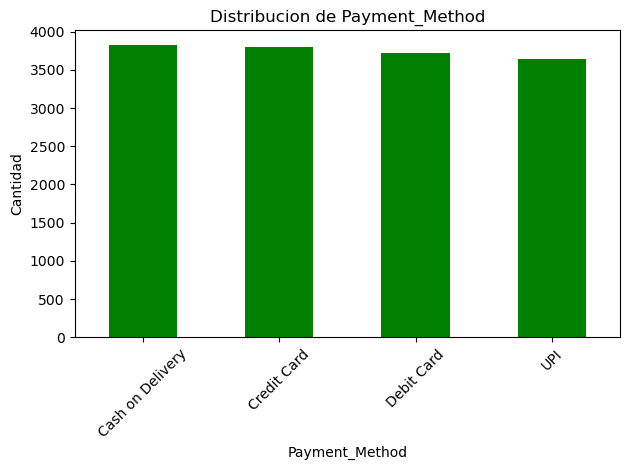

In [13]:
for col in ['Delivery_Status', 'Product_Category', 'Payment_Method']:
    amazon[col].value_counts().plot(kind='bar',color='green')
    plt.title(f'Distribucion de {col}')
    plt.ylabel('Cantidad')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [14]:
tabla = pd.crosstab(amazon['Product_Category'], amazon['Delivery_Status'])
tabla

Delivery_Status,Delivered,Pending,Returned
Product_Category,,,
Beauty,1072,971,954
Books,1017,989,1029
Clothing,991,1049,982
Electronics,1007,1023,1006
Home & Kitchen,988,1012,910


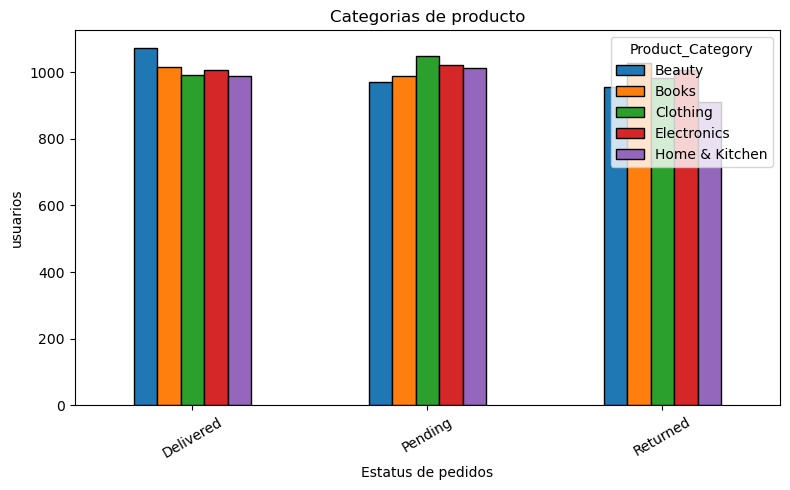

In [15]:
tabla.T.plot(kind='bar',figsize=(8,5),edgecolor='black')
plt.title('Categorias de producto')
plt.xlabel('Estatus de pedidos')
plt.ylabel('usuarios')
plt.xticks(rotation=30)
#plt.grid(True)
plt.tight_layout()
plt.show()

De forma general se puede observar que las diferentes categorias se muestran uniformes en cuanto las cantidades que son recibidas vs las que son devueltas, incluso de acuerdo al tipo de producto, los mas solicitados son los articulos de la categoria de belleza, los que contabilizan una mayor cantidad de devoluciones, son los libros

In [16]:
tabla_revs = amazon['Review_Text'].value_counts().reset_index()
tabla_revs.columns=['Review_Text', 'count']

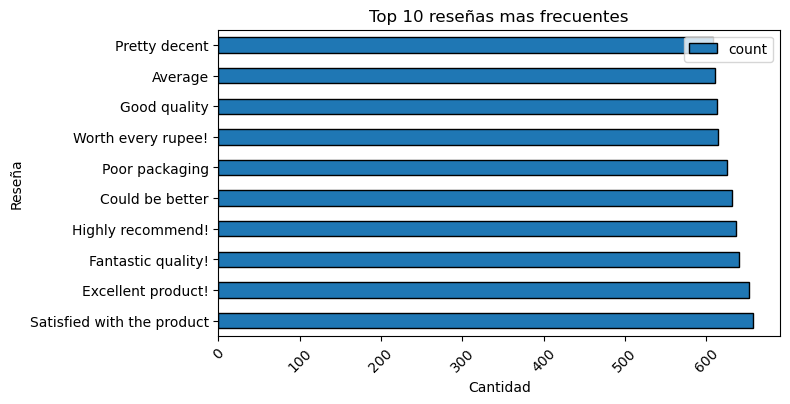

In [17]:
tabla_revs.head(10).plot(kind='barh', figsize = (8,4),x='Review_Text', y='count', edgecolor='black')
plt.title('Top 10 reseñas mas frecuentes')
plt.xlabel('Cantidad')
plt.ylabel('Reseña')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [18]:
tabla_rating = amazon['Review_Rating'].value_counts().reset_index()
tabla_rating.columns=['Review_Rating', 'count']

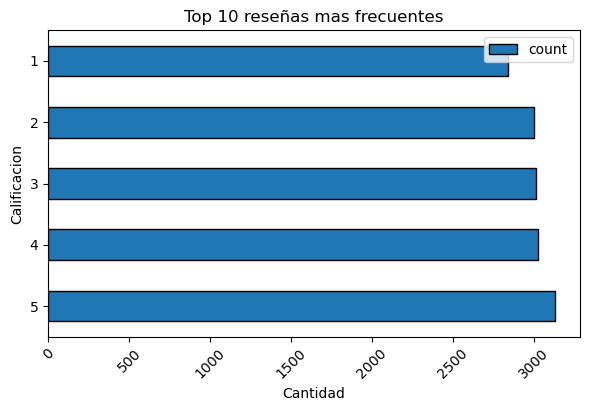

In [19]:
tabla_rating.head(10).plot(kind='barh', figsize = (6,4),x='Review_Rating', y='count', edgecolor='black')
plt.title('Top 10 reseñas mas frecuentes')
plt.xlabel('Cantidad')
plt.ylabel('Calificacion')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [20]:
amazon['Review_lenght'] = amazon['Review_Text'].str.len()

In [21]:
amazon.head()

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country,Review_lenght
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India,14
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India,18
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India,9
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India,17
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India,17


In [22]:
amazon['Date'].value_counts().reset_index().sort_index()

,Date,count
0,2025-05-26,59
1,2025-12-17,58
2,2025-12-07,54
3,2025-12-21,54
4,2025-08-10,54
...,...,...
360,2025-12-09,27
361,2025-04-02,27
362,2025-07-22,27
363,2025-02-01,26


Separamos los meses de cada registro para conocer las ventas por mes

In [23]:
amazon['Mes'] = amazon['Date'].dt.month
vta_mes = amazon.groupby('Mes')['Total_Sales_INR'].sum().reset_index()
vta_mes

,Mes,Total_Sales_INR
0,1,92051785.03
1,2,84995760.62
2,3,93064349.39
3,4,91388990.14
4,5,97195848.48
5,6,89730685.72
6,7,95176904.42
7,8,97576563.09
8,9,91225555.74
9,10,93478344.05


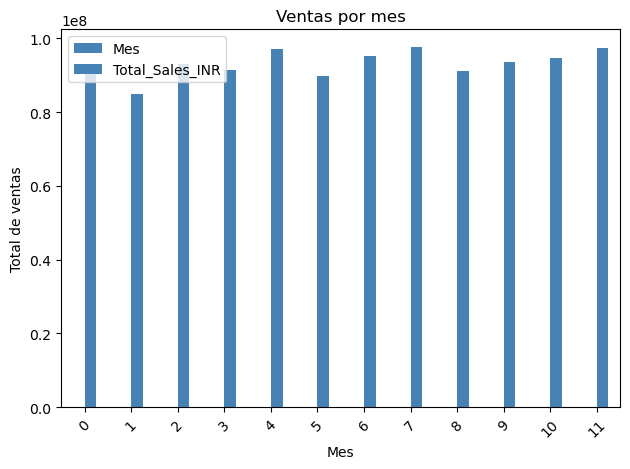

In [24]:
vta_mes.plot(kind='bar', color='steelblue')
plt.title('Ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Total de ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Al comparar las ventas en cada uno de los meses observamos que la tendencia se mantiene cada 3er mes aproximadamente, baja pero se vuelve a recuperar, se nota un comportamiento periodico, basicamente se mantiene

Solo resta aplicar algoritmo de procesamiento de texto para conocer sobre las resenas

In [25]:
ventas_por_estado = amazon.groupby(['State','Delivery_Status']).size().unstack(fill_value=0).sort_values(by='Returned', ascending=False)
ventas_por_estado.head()

Delivery_Status,Delivered,Pending,Returned
State,,,
Assam,161,191,201
Uttar Pradesh,189,166,196
Sikkim,208,195,193
Tamil Nadu,192,184,191
Rajasthan,189,190,189


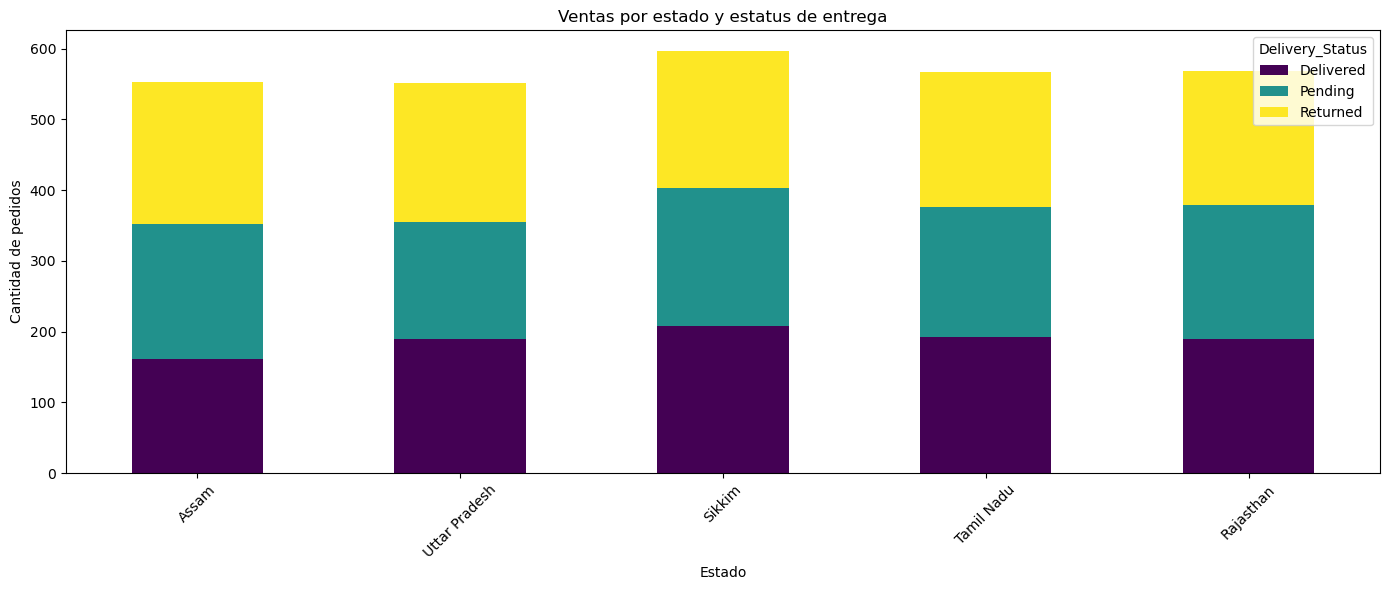

In [26]:
ventas_por_estado.head().plot(kind='bar', stacked=True, figsize=(14, 6), colormap='viridis')
plt.title('Ventas por estado y estatus de entrega')
plt.xlabel('Estado')
plt.ylabel('Cantidad de pedidos')
plt.xticks(rotation=45)
#plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()

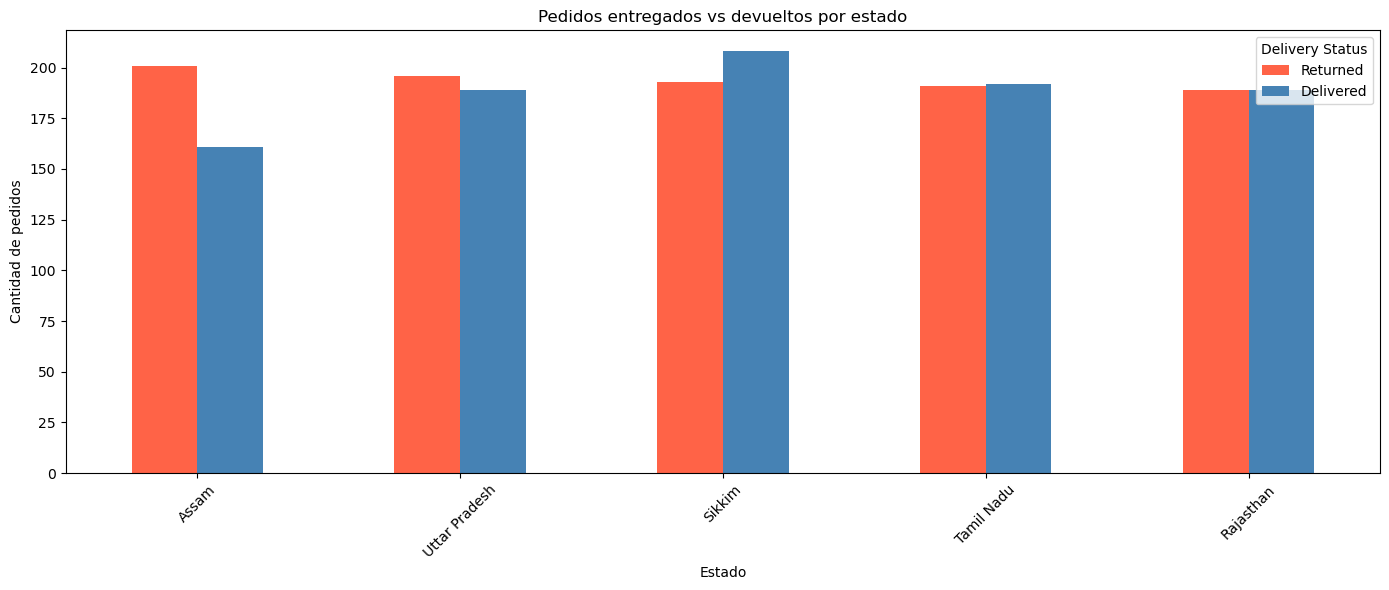

In [27]:
ventas_filtradas = ventas_por_estado[['Returned', 'Delivered']].head()
ventas_filtradas.plot(kind='bar', stacked=False, figsize=(14, 6), color=['tomato', 'steelblue'])
plt.title('Pedidos entregados vs devueltos por estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de pedidos')
plt.xticks(rotation=45)
plt.legend(title='Delivery Status')
plt.tight_layout()
plt.show()

In [28]:
estado_mayores_vtas = amazon.groupby(['State','Mes'])['Total_Sales_INR'].sum().reset_index().sort_values(by='Total_Sales_INR', ascending=False)
estado_mayores_vtas.head()

,State,Mes,Total_Sales_INR
299,Tripura,12,5203943.19
268,Tamil Nadu,5,5174806.66
156,Maharashtra,1,4967396.08
217,Odisha,2,4882072.36
260,Sikkim,9,4721396.57


In [29]:
estado_mayores_vtas['Estado_Mes'] = estado_mayores_vtas['State'] + ' - ' + estado_mayores_vtas['Mes'].astype(str)

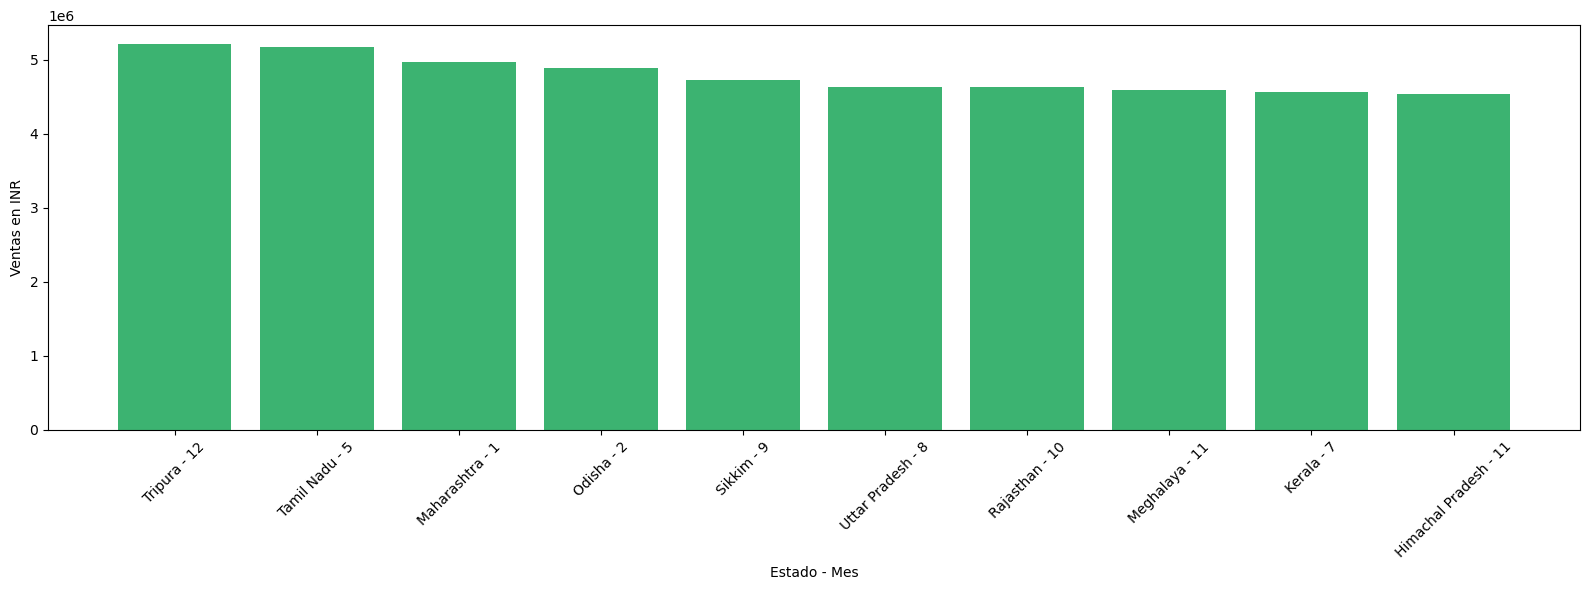

In [30]:
top_10 = estado_mayores_vtas.head(10)
plt.figure(figsize=(16, 6))
plt.bar(top_10['Estado_Mes'], top_10['Total_Sales_INR'], color='mediumseagreen')
plt.xlabel('Estado - Mes')
plt.ylabel('Ventas en INR')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
reseñas_devol = amazon.groupby(['Product_Category', 'Delivery_Status', 'Review_Text']).size().reset_index(name='count')
reseñas_devol.head()

,Product_Category,Delivery_Status,Review_Text,count
0,Beauty,Delivered,Average,46
1,Beauty,Delivered,Could be better,47
2,Beauty,Delivered,Defective item,37
3,Beauty,Delivered,Disappointed,45
4,Beauty,Delivered,Excellent product!,46


In [32]:
#reseñas_devol['Delivery_Status']=='Returned'.value_counts().head(50)
returned = reseñas_devol[reseñas_devol['Delivery_Status']=='Returned']
returned.sort_values(by='count', ascending=False).head(10)

,Product_Category,Delivery_Status,Review_Text,count
149,Books,Returned,Would buy again,58
281,Electronics,Returned,Fantastic quality!,57
279,Electronics,Returned,Excellent product!,56
282,Electronics,Returned,Good quality,55
212,Clothing,Returned,Not satisfied,54
143,Books,Returned,Satisfied with the product,53
138,Books,Returned,Okay product,52
285,Electronics,Returned,Never buying again,51
288,Electronics,Returned,Okay product,51
202,Clothing,Returned,Defective item,50


In [33]:
returned['Review_Text'].value_counts()

Review_Text
Average                       5
Okay product                  5
Worth every rupee!            5
Waste of money                5
Very bad product              5
Value for money               5
Terrible experience           5
Satisfied with the product    5
Quality could improve         5
Product not as expected       5
Pretty decent                 5
Poor packaging                5
Not satisfied                 5
Could be better               5
Not bad                       5
Never buying again            5
Loved it!                     5
Highly recommend!             5
Good quality                  5
Fantastic quality!            5
Fair deal                     5
Excellent product!            5
Disappointed                  5
Defective item                5
Would buy again               5
Name: count, dtype: int64

Aplicamos analisis de texto, con base en textblob, para conocer la polaridad y subjetividad, con esto trataremos de saber si existe una relacion directa entre las devoluciones y las reseñas de cada usuario

In [34]:
returned = reseñas_devol[reseñas_devol['Delivery_Status']=='Returned'].copy()

In [35]:
returned['Polarity'] = returned['Review_Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
returned['Subjectivity'] = returned['Review_Text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

In [36]:
print(returned[['Review_Text', 'Polarity', 'Subjectivity']].head(10))

           Review_Text  Polarity  Subjectivity
50             Average    -0.150          0.40
51     Could be better     0.500          0.50
52      Defective item     0.000          0.00
53        Disappointed    -0.750          0.75
54  Excellent product!     1.000          1.00
55           Fair deal     0.700          0.90
56  Fantastic quality!     0.500          0.90
57        Good quality     0.700          0.60
58   Highly recommend!     0.200          0.54
59           Loved it!     0.875          0.80


In [37]:
print(returned[['Polarity','Subjectivity']].describe())

         Polarity  Subjectivity
count  125.000000    125.000000
mean     0.105933      0.534267
std      0.511844      0.371249
min     -1.000000      0.000000
25%     -0.150000      0.100000
50%      0.000000      0.600000
75%      0.500000      0.866667
max      1.000000      1.000000


In [38]:
print(returned[returned['Polarity']<0][['Review_Text', 'Polarity']].sort_values(by='Polarity').head(15))

             Review_Text  Polarity
219  Terrible experience     -1.00
294  Terrible experience     -1.00
369  Terrible experience     -1.00
69   Terrible experience     -1.00
144  Terrible experience     -1.00
221     Very bad product     -0.91
71      Very bad product     -0.91
371     Very bad product     -0.91
296     Very bad product     -0.91
146     Very bad product     -0.91
353         Disappointed     -0.75
203         Disappointed     -0.75
278         Disappointed     -0.75
128         Disappointed     -0.75
53          Disappointed     -0.75


In [39]:
print(returned.sort_values(by='Subjectivity', ascending=False)[['Review_Text','Subjectivity']].head(15))

                    Review_Text  Subjectivity
212               Not satisfied           1.0
368  Satisfied with the product           1.0
279          Excellent product!           1.0
293  Satisfied with the product           1.0
294         Terrible experience           1.0
219         Terrible experience           1.0
218  Satisfied with the product           1.0
204          Excellent product!           1.0
354          Excellent product!           1.0
144         Terrible experience           1.0
137               Not satisfied           1.0
129          Excellent product!           1.0
362               Not satisfied           1.0
69          Terrible experience           1.0
68   Satisfied with the product           1.0


Vamos a aplicar un modelo de clasificacion multiclase donde consideremos todas las variables categoricas involucradas en el estatus de los pedidos, para conocer la relacion entre los pedidos con devolucion y si estos tienen relacion con los sentimientos de evaluacion

Opcion, en esta ocasion podemos aplicar OHE, considerando solo las variables entregada y devuelta, para conocer la incidencia entre una y otra, dejamos la polaridad y satisfaccion

#### Descartamos la opcion de utilizar solo dos variables ya que al tratar solo de considerar las dos variables sin Pending, estariamos sesgando el modelo y afectando el analisis y a su vez el resultado, por tanto se procede a terminar el analisis con las tres variables como multiclase

In [40]:
amazon.head()

,Order_ID,Date,Customer_ID,Product_Category,Product_Name,Quantity,Unit_Price_INR,Total_Sales_INR,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Country,Review_lenght,Mes
0,ORD100000,2025-01-25,CUST2796,Home & Kitchen,Cookware Set,2,25574.41,51148.82,Credit Card,Returned,1,Waste of money,Sikkim,India,14,1
1,ORD100001,2025-08-28,CUST9669,Beauty,Hair Dryer,1,19361.41,19361.41,Debit Card,Returned,5,Excellent product!,Telangana,India,18,8
2,ORD100002,2025-02-27,CUST5808,Electronics,Tablet,3,38476.22,115428.66,Cash on Delivery,Delivered,3,Fair deal,Nagaland,India,9,2
3,ORD100003,2025-02-24,CUST5889,Electronics,Headphones,5,38145.72,190728.60,Credit Card,Delivered,5,Highly recommend!,Assam,India,17,2
4,ORD100004,2025-06-15,CUST9005,Clothing,Saree,5,45940.98,229704.90,UPI,Delivered,5,Highly recommend!,Odisha,India,17,6


In [41]:
#amazon['Delivery_Status'] = amazon['Delivery_Status'].astype(str).str.strip()
#amazon['Status_Code'] = amazon['Delivery_Status'].map({'Returned':1, 'Delivered':0})

In [42]:
#amazon[['Delivery_Status', 'Status_Code']].head()

In [43]:
#amazon['Polarity'] = amazon['Review_Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
#amazon['Subjectivity'] = amazon['Review_Text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

#### De aqui en adelante aplicamos codificacion multiclase considerando las 3 categorias de pedidos

In [44]:
amazon['Delivery_Status'] = amazon['Delivery_Status'].astype('category')
#Codificamos las variables con ello convertimos los valores en 0,1,2
amazon['Status_Code'] = LabelEncoder().fit_transform(amazon['Delivery_Status'])

In [45]:
amazon['Polarity'] = amazon['Review_Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
amazon['Subjectivity'] = amazon['Review_Text'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

In [46]:
#Seleccionamos los features
x=amazon[['Polarity', 'Subjectivity','Review_Text']]
y=amazon['Status_Code']

In [47]:
#Aplicamos vectorizador TFIDF vectorizer para convertir en numericos el texto plano de las reseñas
X_text = TfidfVectorizer(max_features=500).fit_transform(amazon['Review_Text'])

In [48]:
X_num = amazon[['Polarity', 'Subjectivity']].values
X_combined = np.hstack((X_num, X_text.toarray()))

In [49]:
modelo = RandomForestClassifier()
modelo.fit(X_combined, y)

RandomForestClassifier()

In [50]:
#Accuracy score
from sklearn.metrics import accuracy_score

y_pred = modelo.predict(X_combined)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.35


In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binariza las clases (ej. 0, 1, 2 → [1,0,0], [0,1,0], etc.)
y_bin = label_binarize(y, classes=np.unique(y))

# Probabilidades por clase
y_prob = modelo.predict_proba(X_combined)

# AUC multiclase
auc = roc_auc_score(y_bin, y_prob, average='macro', multi_class='ovr')
print(f"ROC-AUC multiclase: {auc:.2f}")


ROC-AUC multiclase: 0.53


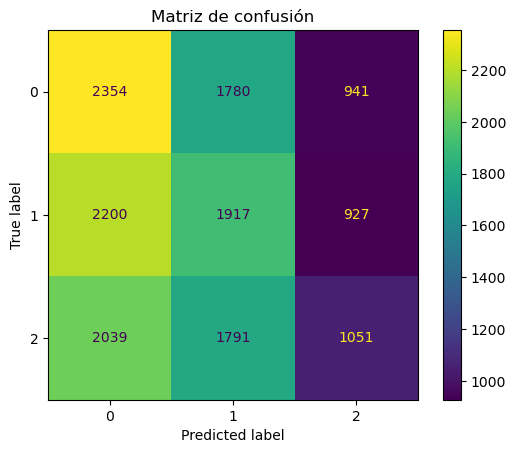

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Matriz de confusión")
plt.show()


#### El modelo tuvo varias dificultades para distinguir las diferentes variables, por lo tanto, es conveniente repetir el procedimiento aplicando OHE para considerar mas variables y poder conocer si realmente se puede lograr visualizar una relacion directa de los productos devueltos por los clientes o simplemenete esa relacion no existe

In [53]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          15000 non-null  object        
 1   Date              15000 non-null  datetime64[ns]
 2   Customer_ID       15000 non-null  object        
 3   Product_Category  15000 non-null  object        
 4   Product_Name      15000 non-null  object        
 5   Quantity          15000 non-null  int64         
 6   Unit_Price_INR    15000 non-null  float64       
 7   Total_Sales_INR   15000 non-null  float64       
 8   Payment_Method    15000 non-null  object        
 9   Delivery_Status   15000 non-null  category      
 10  Review_Rating     15000 non-null  int64         
 11  Review_Text       15000 non-null  object        
 12  State             15000 non-null  object        
 13  Country           15000 non-null  object        
 14  Review_lenght     1500

In [54]:
amazon_filtrado = amazon.drop(['Order_ID','Date','Customer_ID','Quantity','Unit_Price_INR','Total_Sales_INR','Country','Review_lenght','Status_Code','Polarity','Subjectivity'], axis=1)
amazon_filtrado.head(3)

,Product_Category,Product_Name,Payment_Method,Delivery_Status,Review_Rating,Review_Text,State,Mes
0,Home & Kitchen,Cookware Set,Credit Card,Returned,1,Waste of money,Sikkim,1
1,Beauty,Hair Dryer,Debit Card,Returned,5,Excellent product!,Telangana,8
2,Electronics,Tablet,Cash on Delivery,Delivered,3,Fair deal,Nagaland,2


#### Antes de aplicar OHE, aplicamos un filtro para separar solo la variable Returned y Delivered, con ello solo consideramos el modelo de forma binaria, con esto podemos centrarnos mas en los paquetes recibidos y los devueltos, sin tener certeza sobre los que estan pendientes

In [55]:
OHE_bin = amazon_filtrado[amazon_filtrado['Delivery_Status'].isin(['Returned','Delivered'])].copy()
OHE_bin['Status_Code']=OHE_bin['Delivery_Status'].map({'Returned':1, 'Delivered':0})

In [56]:
OHE = pd.get_dummies(OHE_bin)

In [57]:
OHE['Status_Code'].astype(int)

0        1
1        1
2        0
3        0
4        0
        ..
14992    0
14993    0
14995    0
14996    0
14997    0
Name: Status_Code, Length: 9956, dtype: int32

In [58]:
OHE.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9956 entries, 0 to 14997
Data columns (total 93 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Review_Rating                           9956 non-null   int64  
 1   Mes                                     9956 non-null   int32  
 2   Status_Code                             9956 non-null   float64
 3   Product_Category_Beauty                 9956 non-null   bool   
 4   Product_Category_Books                  9956 non-null   bool   
 5   Product_Category_Clothing               9956 non-null   bool   
 6   Product_Category_Electronics            9956 non-null   bool   
 7   Product_Category_Home & Kitchen         9956 non-null   bool   
 8   Product_Name_Air Fryer                  9956 non-null   bool   
 9   Product_Name_Biography                  9956 non-null   bool   
 10  Product_Name_Children's Book            9956 non-null   bool   


In [59]:
OHE.columns

Index(['Review_Rating', 'Mes', 'Status_Code', 'Product_Category_Beauty',
       'Product_Category_Books', 'Product_Category_Clothing',
       'Product_Category_Electronics', 'Product_Category_Home & Kitchen',
       'Product_Name_Air Fryer', 'Product_Name_Biography',
       'Product_Name_Children's Book', 'Product_Name_Comics',
       'Product_Name_Cookware Set', 'Product_Name_Face Cream',
       'Product_Name_Fiction Novel', 'Product_Name_Hair Dryer',
       'Product_Name_Headphones', 'Product_Name_Jacket', 'Product_Name_Jeans',
       'Product_Name_Laptop', 'Product_Name_Lipstick',
       'Product_Name_Mixer Grinder', 'Product_Name_Perfume',
       'Product_Name_Saree', 'Product_Name_Science Textbook',
       'Product_Name_Shampoo', 'Product_Name_Smartphone',
       'Product_Name_Smartwatch', 'Product_Name_Sneakers',
       'Product_Name_T-Shirt', 'Product_Name_Tablet',
       'Product_Name_Vacuum Cleaner', 'Product_Name_Water Purifier',
       'Payment_Method_Cash on Delivery', 'Pay

In [60]:
cols = ['Review_Rating', 'Mes', 'Product_Category_Books',
       'Product_Category_Clothing', 'Product_Category_Electronics',
       'Product_Category_Home & Kitchen', 'Product_Name_Biography',
       "Product_Name_Children's Book", 'Product_Name_Comics',
       'Product_Name_Cookware Set', 'Product_Name_Face Cream',
       'Product_Name_Fiction Novel', 'Product_Name_Hair Dryer',
       'Product_Name_Headphones', 'Product_Name_Jacket', 'Product_Name_Jeans',
       'Product_Name_Laptop', 'Product_Name_Lipstick',
       'Product_Name_Mixer Grinder', 'Product_Name_Perfume',
       'Product_Name_Saree', 'Product_Name_Science Textbook',
       'Product_Name_Shampoo', 'Product_Name_Smartphone',
       'Product_Name_Smartwatch', 'Product_Name_Sneakers',
       'Product_Name_T-Shirt', 'Product_Name_Tablet',
       'Product_Name_Vacuum Cleaner', 'Product_Name_Water Purifier',
       'Payment_Method_Credit Card', 'Payment_Method_Debit Card',
       'Payment_Method_UPI', 'Delivery_Status_Pending',
       'Delivery_Status_Returned', 'Review_Text_Could be better',
       'Review_Text_Defective item', 'Review_Text_Disappointed',
       'Review_Text_Excellent product!', 'Review_Text_Fair deal',
       'Review_Text_Fantastic quality!', 'Review_Text_Good quality',
       'Review_Text_Highly recommend!', 'Review_Text_Loved it!',
       'Review_Text_Never buying again', 'Review_Text_Not bad',
       'Review_Text_Not satisfied', 'Review_Text_Okay product',
       'Review_Text_Poor packaging', 'Review_Text_Pretty decent',
       'Review_Text_Product not as expected',
       'Review_Text_Quality could improve',
       'Review_Text_Satisfied with the product',
       'Review_Text_Terrible experience', 'Review_Text_Value for money',
       'Review_Text_Very bad product', 'Review_Text_Waste of money',
       'Review_Text_Worth every rupee!', 'Review_Text_Would buy again',
       'State_Arunachal Pradesh', 'State_Assam', 'State_Bihar',
       'State_Chhattisgarh', 'State_Goa', 'State_Gujarat', 'State_Haryana',
       'State_Himachal Pradesh', 'State_Jharkhand', 'State_Karnataka',
       'State_Kerala', 'State_Madhya Pradesh', 'State_Maharashtra',
       'State_Manipur', 'State_Meghalaya', 'State_Mizoram', 'State_Nagaland',
       'State_Odisha', 'State_Punjab', 'State_Rajasthan', 'State_Sikkim',
       'State_Tamil Nadu', 'State_Telangana', 'State_Tripura',
       'State_Uttar Pradesh', 'State_Uttarakhand', 'State_West Bengal']

In [61]:
for col in cols:
    print(OHE[col].value_counts())

Review_Rating
5    2065
3    2001
4    1993
2    1973
1    1924
Name: count, dtype: int64
Mes
8     877
12    856
1     840
7     835
3     830
9     828
6     827
5     824
11    815
2     814
10    807
4     803
Name: count, dtype: int64
Product_Category_Books
False    7910
True     2046
Name: count, dtype: int64
Product_Category_Clothing
False    7983
True     1973
Name: count, dtype: int64
Product_Category_Electronics
False    7943
True     2013
Name: count, dtype: int64
Product_Category_Home & Kitchen
False    8058
True     1898
Name: count, dtype: int64
Product_Name_Biography
False    9574
True      382
Name: count, dtype: int64
Product_Name_Children's Book
False    9544
True      412
Name: count, dtype: int64
Product_Name_Comics
False    9529
True      427
Name: count, dtype: int64
Product_Name_Cookware Set
False    9593
True      363
Name: count, dtype: int64
Product_Name_Face Cream
False    9550
True      406
Name: count, dtype: int64
Product_Name_Fiction Novel
False    9557
T

In [62]:
print(OHE['Delivery_Status_Returned'].value_counts(normalize=True))
print(OHE['Delivery_Status_Delivered'].value_counts(normalize=True))
print(OHE['Delivery_Status_Pending'].value_counts(normalize=True))

Delivery_Status_Returned
False    0.509743
True     0.490257
Name: proportion, dtype: float64
Delivery_Status_Delivered
True     0.509743
False    0.490257
Name: proportion, dtype: float64
Delivery_Status_Pending
False    1.0
Name: proportion, dtype: float64


In [63]:
#Definimos variables para entrenar el modelo
features = OHE.drop('Delivery_Status_Returned', axis=1)
target = OHE['Delivery_Status_Returned']

#Dividir el dataset original en conjuntos de entrenamiento-validacion y prueba, en el mismo se considera el 20% en tamaño de prueba
features_train_val, features_test, target_train_val, target_test = train_test_split(features, target, test_size=0.20, random_state=54321)

#Despues, dividimos el conjunto construido en la primera linea, entrenamiento y validacion
# Para este caso se tiene el 80% del original, y queremos que la validación sea el 25% de eso lo que corresponde a (0.25 * 0.80 = 0.20 del total)

features_train, features_valid, target_train, target_valid = train_test_split(features_train_val, target_train_val, test_size=0.25, random_state=54321)

model = DecisionTreeClassifier(random_state=12345, max_depth = 5)
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)

print(f'Accuracy valid: {accuracy_valid}')
print('F1 valid:', f1_score(target_valid, predicted_valid))

test_predictions = model.predict(features_test)
score_test = accuracy_score(target_test, test_predictions)
print(f'Accuracy test: {score_test:.2f}')

dtree_score = f1_score(target_test, test_predictions)
print(f'F1 score test: {dtree_score:.2f}')

recall = recall_score(target_test, test_predictions)
print(f'Recall:{recall:.2f}')

Accuracy valid: 1.0
F1 valid: 1.0
Accuracy test: 1.00
F1 score test: 1.00
Recall:1.00


In [64]:
#aplicamos RandomForestClassifier
model_rf = RandomForestClassifier(random_state=12345, max_depth = 20, n_estimators = 100)
model_rf.fit(features_train, target_train)
predicted_valid = model_rf.predict(features_valid)
accuracy_valid = accuracy_score(target_valid, predicted_valid)

print(f'Accuracy valid: {accuracy_valid}')
print('F1 valid:', f1_score(target_valid, predicted_valid))

test_predict_rf = model_rf.predict(features_test)
score_test = accuracy_score(target_test, test_predictions)
print(f'Accuracy test: {score_test:.2f}')

rf_score = f1_score(target_test, test_predictions)
print(f'F1 score test: {rf_score:.2f}')

recall_rf = recall_score(target_test, test_predictions)
print(f'Recall:{recall_rf:.2f}')

Accuracy valid: 1.0
F1 valid: 1.0
Accuracy test: 1.00
F1 score test: 1.00
Recall:1.00


In [65]:
model_cat = CatBoostClassifier(loss_function='Logloss',
                              iterations = 150,
                              random_seed=12345)
model_cat.fit(features_train, target_train, verbose=10)

probabilities_valid = model_cat.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]

print(f'AUC-ROC:{roc_auc_score(target_valid, probabilities_one_valid)}')

Learning rate set to 0.125861
0:	learn: 0.3037737	total: 148ms	remaining: 22s
10:	learn: 0.0032368	total: 200ms	remaining: 2.53s
20:	learn: 0.0005849	total: 250ms	remaining: 1.54s
30:	learn: 0.0003800	total: 296ms	remaining: 1.13s
40:	learn: 0.0002948	total: 344ms	remaining: 913ms
50:	learn: 0.0002947	total: 403ms	remaining: 783ms
60:	learn: 0.0002946	total: 471ms	remaining: 687ms
70:	learn: 0.0002945	total: 529ms	remaining: 588ms
80:	learn: 0.0002944	total: 591ms	remaining: 503ms
90:	learn: 0.0002944	total: 658ms	remaining: 427ms
100:	learn: 0.0002943	total: 719ms	remaining: 349ms
110:	learn: 0.0002942	total: 780ms	remaining: 274ms
120:	learn: 0.0002942	total: 845ms	remaining: 203ms
130:	learn: 0.0002941	total: 965ms	remaining: 140ms
140:	learn: 0.0002940	total: 1.13s	remaining: 72.3ms
149:	learn: 0.0002938	total: 1.28s	remaining: 0us
AUC-ROC:0.9999999999999999


In [66]:
x

,Polarity,Subjectivity,Review_Text
0,-0.2,0.00,Waste of money
1,1.0,1.00,Excellent product!
2,0.7,0.90,Fair deal
3,0.2,0.54,Highly recommend!
4,0.2,0.54,Highly recommend!
...,...,...,...
14995,0.0,0.00,Never buying again
14996,0.5,1.00,Satisfied with the product
14997,-0.2,0.00,Waste of money
14998,0.5,0.50,Okay product


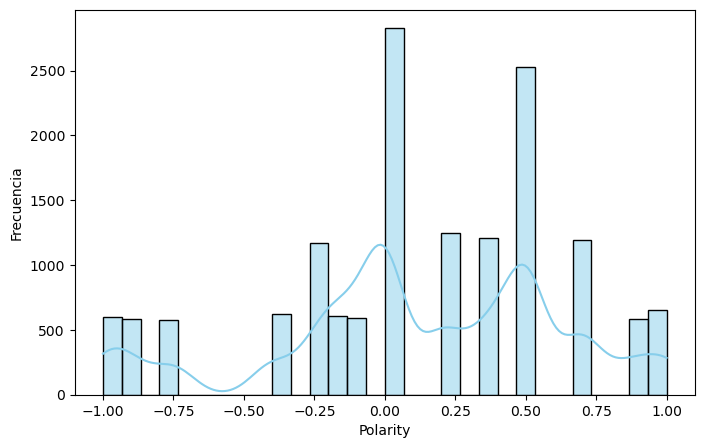

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(x['Polarity'], bins=30, kde=True, color='skyblue')
#plt.title('Distribución de Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frecuencia')
plt.show()


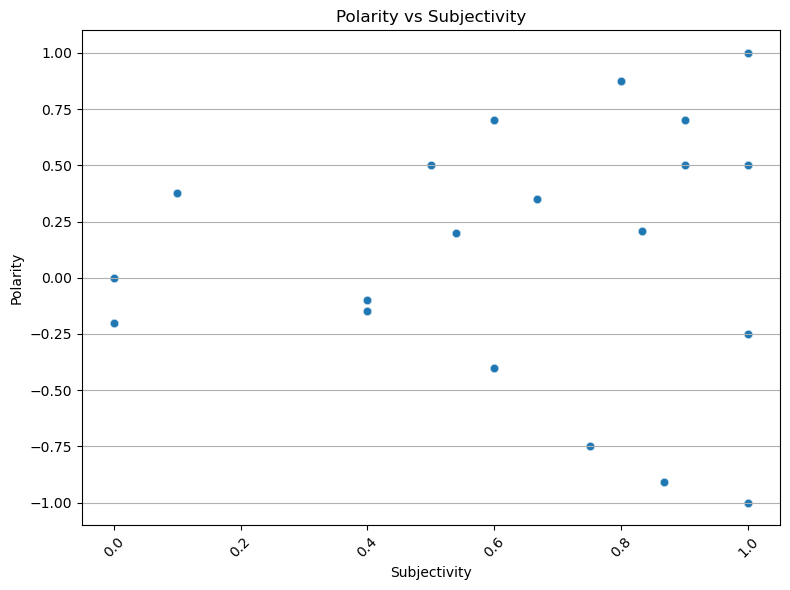

In [68]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Subjectivity', y='Polarity', data=x, alpha=0.5)
plt.title('Polarity vs Subjectivity')
#plt.xlabel()
#plt.ylabel()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

Aplicamos la prueba estadistica de hipotesis Chi-cuadrado,<br>

<br> - H₀ (nula): No hay relación entre el estatus de entrega y la satisfacción del cliente

<br> - H₁ (alternativa): Sí hay relación entre devoluciones y satisfacción

In [77]:
# Supongamos que ya tienes una columna 'Polarity' de análisis de sentimiento
returned['Review_Sentiment'] = pd.cut(returned['Polarity'],
                                bins=[-1, -0.1, 0.1, 1],
                                labels=['Negativa', 'Neutral', 'Positiva'])

In [82]:
tabla = pd.crosstab(returned['Delivery_Status'], returned['Review_Sentiment'])
chi2, p, dof, expected = chi2_contingency(tabla)
print(f'Valor p: {p}')

Valor p: 1.0


### Conclusiones

-Se aplicaron varios analisis para conocer la relacion entre las reseñas y las devoluciones a traves de la polaridad y subjetividad, los resultados no mostraron una relacion directa entre la insatisfaccion del producto y las devoluciones, ya que en ocasiones las valoraciones no mostraban un desacuerdo con las devoluciones y con las calificaciones del producto, por tanto, es dificil entender con estos valores si realmente existe una relacion entre la inconformidad del cliente con las devoluciones de los productos <br>
-Se aplicaron varios modelos como Random Forest, DecissionTree, CatBoost, en todos ellos se distingue el que modelo funciono y puede definirse como que es bueno para interpretar cuando se realiza una devolucion, obteniendo en todos 1.0
- Finalmente aplicamos una prueba chi-cuadrado de analisis estadistico, con esto estariamos confirmando que no tenemos evidencia suficiente para confirmar que estan relacionadas las devoluciones con la insatisfaccion del cliente